# Game On: Leveraging Box Office Trends for Microsoft's Movie Studio

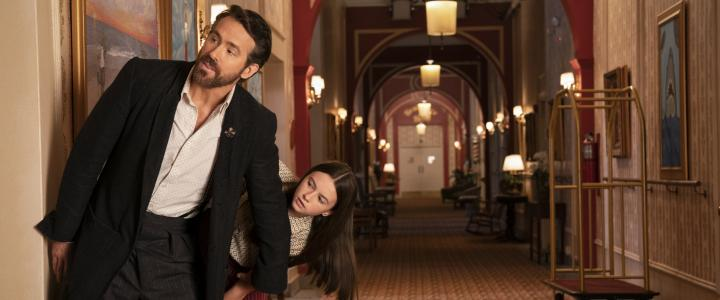
photo by Bruce.Nash on [thenumber](https://www.the-numbers.com/images/movies/If-(2024)-2-News.jpg)

## Overview
My aim is to  dive into the current box office landscape, uncovering trends that can empower Microsoft's  movie studio to make strategic decisions about its film . By analyzing popular genres,top grossing films, audience demographics, and distribution strategies that will provide actionable insights to guide the studio towards box office success.

## Business Understanding
Microsoft lacks experience in the film industry and wants to establish a movie studio.
In order to determine which movies the corporation should invest in most strategically, I have been entrusted with looking over box office data.

To help me reach my goal, I made the decision to divide the primary target into smaller, more focused goals, like these:

1.To determine the demographic we want to target in order to create material that will appeal to them and help Microsoft achieve box office success.

2.To ascertain the method of distribution to be employed for seeing the films—in theaters or on streaming services—so that the business can capitalize on it.

3.Using the data analysis, to determine which movie genres are the most strategically important to generate.

4.To identify the highest grossing movies in which the business can make investments by examining the production costs in order to optimize profits.


## Data Understanding

Three different files will serve as the data sources for this research.

1.im.db

*Source*-This data set comes from [IMDB](https://www.imdb.com/) a public and free movie database

*Content*-This set of data contains pertinent statistics, like movie ratings and movie fundamentals, that we will use to analyze our issue.

*Format*-The format for this data set is SQL

2.tmdb.movies.csv 

*Source*This data set comes from [TMDB](https://www.themoviedb.org/).It is a community-built library of films and television shows with an emphasis on global communities and a vast amount of data.

*Content*We will use vote count, popularity, and genre IDs in this set of important variables for our study
*Format*-This data is in csv file format


3.tn.movies_budgets.csv

*Source*This data set comes from [TheNumbers](https://www.the-numbers.com/) This is a website that offers past box office information for motion pictures.

*Content*he set's data is arranged according to a number of criteria, such as budget, genre, release date, and domestic/international gross. These numbers immediately answer our inquiries concerning the highest-grossing movies.
*Format*-The format of this data set is a CSV file

## Importing Libraries and Loading Data 

In [56]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

In [63]:
#loading data
rotten_tomatoes = pd.read_csv('./data/rt.movie_info.tsv', sep='\t')
box_office_mojo = pd.read_csv('./data/bom.movie_gross.csv')
tmdb = pd.read_csv('./data/tmdb.movies.csv')
the_numbers = pd.read_csv('./data/tn.movie_budgets.csv')
conn = sqlite3.connect('./data/im.db')
cur = conn.cursor()

In [64]:
#converting  and combining sql data into pandas
query = """
SELECT * 
   FROM movie_ratings
   JOIN movie_basics AS m
   USING(movie_id)
   ORDER BY m.start_year DESC
;
"""

## Checking and Data cleaning
Three movie websites' worth of data will be analyzed for this project: The Numbers, The movieDB, and IMDB (Internet Movie Database). Here are some datasets for you to load and examine.

1.  IMDB database

In [80]:
# identifying random samples
imdb.head(10)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary
2,tt1673732,8.00,20,Break Clause,Break Clause,2019,nan,"Drama,Thriller"
3,tt10075374,8.30,6,The Little Prince,The Little Prince,2019,93.00,Action
4,tt10243678,6.50,1394,Chopsticks,Chopsticks,2019,100.00,"Comedy,Drama"
5,tt10254986,7.00,15,Q Ball,Q Ball,2019,96.00,Documentary
6,tt6845800,8.20,9,Supermen: World War,Supermen: World War,2019,nan,Action
7,tt7533152,7.60,10725,The Boy Who Harnessed the Wind,The Boy Who Harnessed the Wind,2019,113.00,Drama
8,tt7693236,7.90,19,Nuvvu Thopu Raa,Nuvvu Thopu Raa,2019,150.00,Drama
9,tt7766166,5.70,7,Como si fuera la primera vez,Como si fuera la primera vez,2019,nan,Comedy


In [68]:
#identifying number of rows and columns
imdb.shape

(73856, 8)

In [69]:
# identifying imdb information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [70]:
# identifying the null values
imdb.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [71]:
#data description
imdb.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.00,73856.00,73856.00,66236.00
mean,6.33,3523.66,2014.28,94.65
std,1.47,30294.02,2.61,208.57
min,1.00,5.00,2010.00,3.00
25%,5.50,14.00,2012.00,81.00
50%,6.50,49.00,2014.00,91.00
75%,7.40,282.00,2016.00,104.00
max,10.00,1841066.00,2019.00,51420.00


2.  The MovieDB (tmdb) dataset

In [72]:
# checking the information
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [79]:
# Checking number of rows and columns
tmdb.shape

(24835, 10)

In [73]:
# Checking data information
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [75]:
# checking our data description
tmdb.describe()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [76]:
#checking the null values
tmdb.isna().sum()


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

3.  The Numbers Movie Budgets(tn.movie_budgets) dataset

In [83]:
# Exploring the information
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [51]:
Exploring the rows and columns
the_numbers.shape

(5782, 6)

In [52]:
#Exploring data information
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [82]:
# checking our data description
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,24835.00,24835.00,24835.00,24835.00,24835.00
mean,12928.28,292238.83,3.01,5.98,174.20
std,7644.52,154908.34,4.21,1.87,896.47
min,0.00,27.00,0.60,0.00,1.00
25%,6303.50,150749.50,0.60,5.00,1.00
50%,12748.00,303623.00,1.32,6.00,5.00
75%,19494.50,419152.00,3.42,7.00,25.00
max,26516.00,608444.00,80.77,10.00,22186.00


In [53]:
# Exploring the null values
the_numbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Cleaning Data

1.  IMDB database

In [55]:
# Assuming the column containing dollar amounts
def remove_dollar_sign(x):
  return (x.strip('$'))  # Remove dollar sign and convert 

the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_dollar_sign)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_dollar_sign)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_dollar_sign)
# Assuming the column containing commas
def remove_commas_to_int(x):
  return int(x.replace(',', ''))  
# Replace comma with empty string and convert to int
the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_commas_to_int)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_commas_to_int)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_commas_to_int)

# Show the first few rows
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [81]:
# Drop all the duplicates in the dataset
tmdb.drop_duplicates(subset='original_title', inplace=True)
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1
